# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# File Locations

In [2]:
dta_dir = '../data/'

dhs_ind_dir = dta_dir + 'ndhs/dhs_indicators.csv'
ntl_stt_dir = dta_dir + 'nightlights/nightlights_summary_stats.csv'
osm_rod_dir = dta_dir + 'osm/osm_roads.csv'
osm_poi_dir = dta_dir + 'osm/osm_pois.csv'
osm_bld_dir = dta_dir + 'osm/osm_buildings.csv'

# NDHS Data Set Exploratory Data Analysis

In [3]:
TM_pal_categorical_3 = ("#ef4631", "#10b9ce", "#ff9138")
sns.set(
    style="white",
    font_scale=1.25,
    palette=TM_pal_categorical_3,
)

In [4]:
dhs_ind = pd.read_csv(dhs_ind_dir)
print('DHS Indicator Dataset Size : {}'.format(dhs_ind.shape))

DHS Indicator Dataset Size : (1249, 4)


In [15]:
dhs_ind.loc[dhs_ind.wealth_index == min(dhs_ind.wealth_index)]

,cluster_number,wealth_index,education_completed_yrs,electricity_access
1180,1182,-183334.565217,2.782609,0.043478


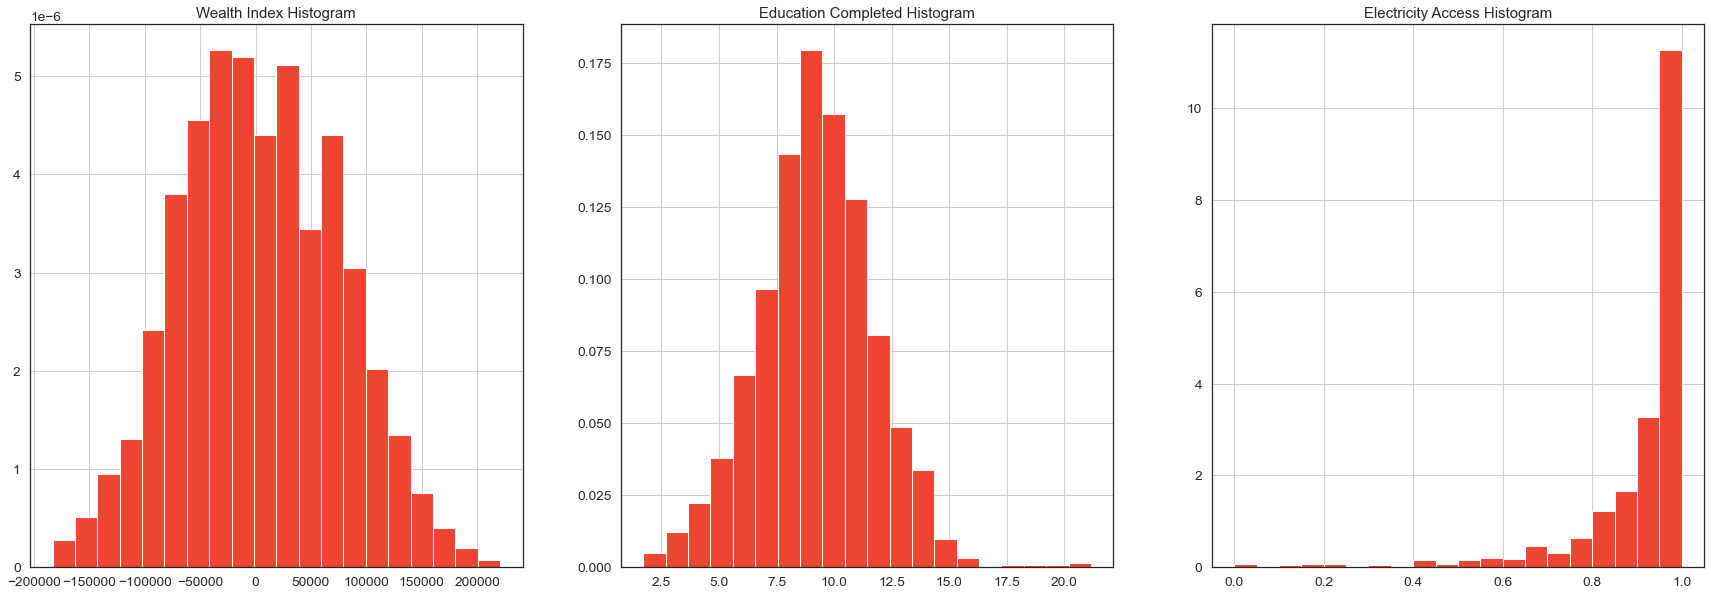

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(30,10))

dhs_ind.wealth_index.hist(ax=ax[0], bins=20, density=True)
dhs_ind.education_completed_yrs.hist(ax=ax[1], bins=20, density=True)
dhs_ind.electricity_access.hist(ax=ax[2], bins=20, density=True)

titles = ['Wealth Index Histogram', 'Education Completed Histogram', 'Electricity Access Histogram']
for i in range(3):
    ax[i].set_title(titles[i])
    

In [36]:
mean_wi = np.mean(dhs_ind.wealth_index)
max_wi = np.max(dhs_ind.wealth_index)
min_wi = np.min(dhs_ind.wealth_index)
std_wi = np.std(dhs_ind.wealth_index)

print(f'The wealth index has a minimum value of {min_wi:.2f} and a maximum value of {max_wi:.2f},\n\
     with a mean of {mean_wi:.2f} standard deviation of {std_wi:.2f}')

max_wi_cluster_num = dhs_ind[dhs_ind['wealth_index'] == max_wi]['cluster_number'].values[0]
min_wi_cluster_num = dhs_ind[dhs_ind['wealth_index'] == min_wi]['cluster_number'].values[0]

print(f'The NDHS cluster with the highest wealth index is {max_wi_cluster_num}\n\
     and the NDHS cluster with the lowest wealth index is {min_wi_cluster_num}')

The wealth index has a minimum value of -183334.57 and a maximum value of 220884.25,
     with a mean of 4129.67 standard deviation of 71503.56
The NDHS cluster with the highest wealth index is 277
     and the NDHS cluster with the lowest wealth index is 1182


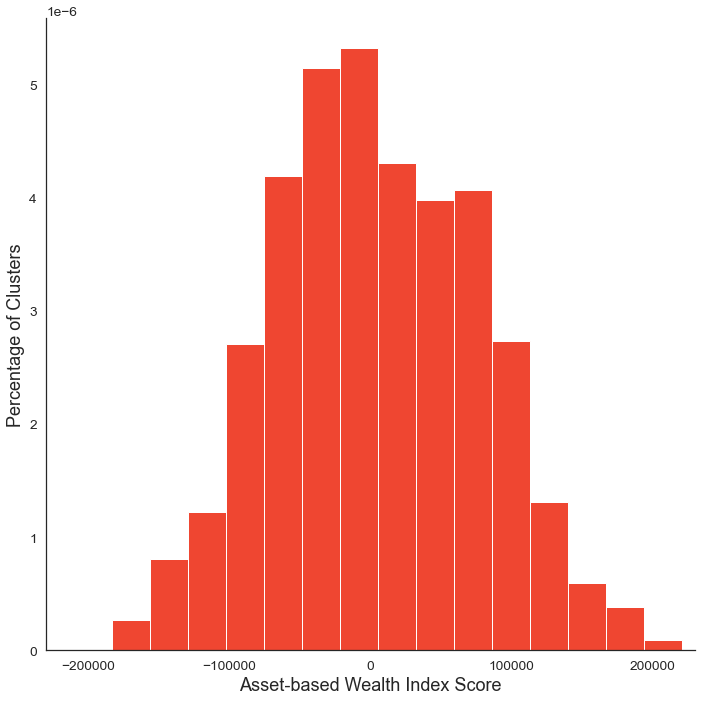

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
dhs_ind.wealth_index.hist(bins=15, density=True)
plt.xticks([-200000, -100000, 0, 100000, 200000])
plt.xlim(-230000, 230000)
plt.xlabel('Asset-based Wealth Index Score', size=18)
plt.ylabel('Percentage of Clusters', size=18)
plt.grid(False)
sns.despine()
plt.tight_layout()

plt.savefig('../images/ph_wealthindex_hist.png', transparent=True, pad_inches=0, dpi=300)